In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import IPython.display as ipd
import librosa
import librosa.display

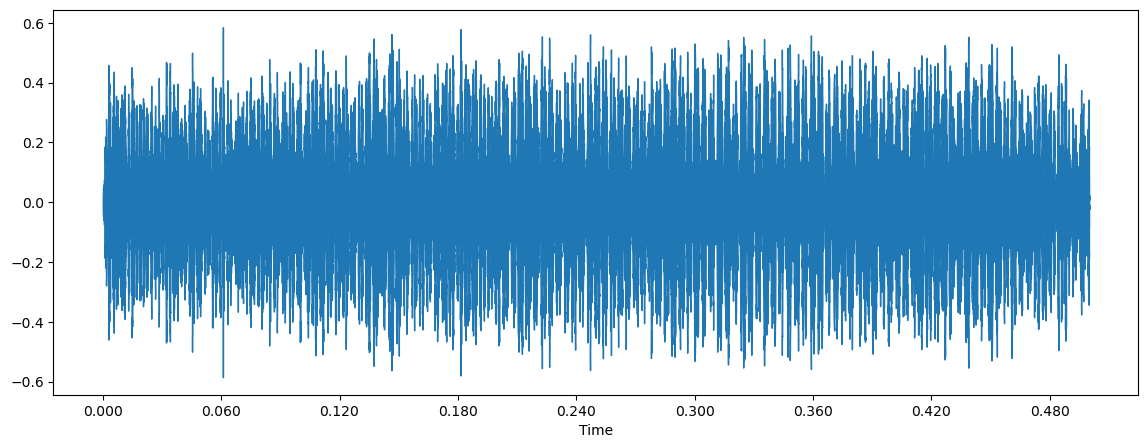

In [3]:
filename="A_R_PC4_mic1_9_ConstructionSite_647_snr=14.874986961886954.wav"
data,sample_rate=librosa.load(filename)
plt.figure(figsize=(14,5))
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [4]:
sample_rate

22050

In [5]:
data

array([-0.01205297, -0.02691471, -0.04633058, ..., -0.08143578,
       -0.0082687 , -0.0229804 ], dtype=float32)

In [6]:
data.shape

(11025,)

In [7]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 22)


In [8]:
mfccs

array([[-1.05108505e+02, -7.92652130e+01, -7.94008408e+01,
        -7.89943085e+01, -7.13627167e+01, -7.17602539e+01,
        -7.48824463e+01, -7.82601089e+01, -7.59161072e+01,
        -7.44084015e+01, -7.82808228e+01, -7.78408356e+01,
        -7.97076569e+01, -8.04512329e+01, -7.78039474e+01,
        -7.73572998e+01, -7.62393265e+01, -7.34265976e+01,
        -7.14403534e+01, -7.45335541e+01, -7.41246033e+01,
        -7.77504578e+01],
       [ 1.18910614e+02,  1.13815018e+02,  1.07277481e+02,
         1.08461090e+02,  1.09053513e+02,  1.07121010e+02,
         1.08945892e+02,  1.08383591e+02,  1.06896843e+02,
         1.10112740e+02,  1.08781845e+02,  1.08123703e+02,
         1.11052040e+02,  1.16803680e+02,  1.20642517e+02,
         1.20785934e+02,  1.17095474e+02,  1.12173798e+02,
         1.16094452e+02,  1.15548874e+02,  1.14674828e+02,
         1.14286163e+02],
       [-2.95603371e+01, -4.08785629e+01, -4.28063507e+01,
        -4.02477417e+01, -4.58308182e+01, -4.79836082e+01,
    

In [9]:
import pandas as pd
import os

# Directory containing the audio files
directory = "C:\\Users\\hp\\Downloads\\Python\\Final_dataset\\train"

# Initialize lists to store data
file_names = []
model_type = []
maneuvering_direction = []
fault = []

# Iterate through files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        # Extracting relevant information from filename
        parts = filename.split('_')
        
        # Assuming the length of model_type, maneuvering_direction, fault is fixed
        model_type.append(parts[0])
        maneuvering_direction.append(parts[1])
        fault.append(parts[2])
        file_names.append(filename)

# Create a DataFrame
data = {
    'File Name': file_names,
    'Model Type': model_type,
    'Maneuvering Direction': maneuvering_direction,
    'Fault': fault
}
train_1 = pd.DataFrame(data)

# Write DataFrame to CSV
train_1.to_csv('train1.csv', index=False)


In [10]:
train_1.head()

File Name Model Type  \
0  A_B_MF1_mic1_0_ConstructionSite_527_snr=12.519...          A   
1  A_B_MF1_mic1_100_EoeunHill_279_snr=11.12957698...          A   
2  A_B_MF1_mic1_101_WestDoor_321_snr=12.345834132...          A   
3  A_B_MF1_mic1_103_ConstructionSite_465_snr=11.8...          A   
4  A_B_MF1_mic1_104_WestDoor_459_snr=10.165930220...          A   

  Maneuvering Direction Fault  
0                     B   MF1  
1                     B   MF1  
2                     B   MF1  
3                     B   MF1  
4                     B   MF1

In [11]:
train_1.sample(5)

File Name Model Type  \
68779   B_B_MF4_mic1_690_EoeunHill_531_snr=13.29694039...          B   
74790   B_B_PC4_mic1_666_DuckPond_416_snr=14.072719623...          B   
13766   A_CC_MF3_mic1_898_DuckPond_473_snr=11.92359695...          A   
120556  B_R_MF2_mic1_917_SportsComplex_892_snr=13.6587...          B   
23561   A_C_MF2_mic2_357_WestDoor_178_snr=11.977095883...          A   

       Maneuvering Direction Fault  
68779                      B   MF4  
74790                      B   PC4  
13766                     CC   MF3  
120556                     R   MF2  
23561                      C   MF2

In [12]:
print(train_1['Model Type'].unique())
print(train_1['Maneuvering Direction'].unique())
print(train_1['Fault'].unique())

['A' 'B' 'C']
['B' 'CC' 'C' 'F' 'L' 'R']
['MF1' 'MF2' 'MF3' 'MF4' 'N' 'PC1' 'PC2' 'PC3' 'PC4']


In [13]:
mapping1 = {'A': 0, 'B': 1, 'C': 2}
mapping2 = {'R': 0, 'L': 1, 'F': 2, 'B': 3, 'CC': 4, 'C': 5}
mapping3 =  {'PC1': 0, 'PC2': 1, 'PC3': 2, 'PC4': 3, 'MF1': 4, 'MF2': 5, 'MF3': 6, 'MF4': 7, 'N': 8}
train_1['Model Type'] = train_1['Model Type'].map(mapping1)
train_1['Maneuvering Direction'] = train_1['Maneuvering Direction'].map(mapping2)
train_1['Fault'] = train_1['Fault'].map(mapping3)

In [14]:
train_1.tail(5)

File Name  Model Type  \
194395  C_R_PC4_mic2_974_ConstructionSite_720_snr=12.8...           2   
194396  C_R_PC4_mic2_975_DuckPond_142_snr=12.327612455...           2   
194397  C_R_PC4_mic2_977_SportsComplex_566_snr=13.2281...           2   
194398  C_R_PC4_mic2_97_WestDoor_280_snr=14.8309085957...           2   
194399  C_R_PC4_mic2_98_WestDoor_227_snr=11.9326010221...           2   

        Maneuvering Direction  Fault  
194395                      0      3  
194396                      0      3  
194397                      0      3  
194398                      0      3  
194399                      0      3

In [15]:
train_1.shape

(194400, 4)

In [16]:
def features_extractor(file_name):
    audio , sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio , sr=sample_rate , n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T , axis=0)

    return mfccs_scaled_features

In [17]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
train_1_path="C:\\Users\\hp\\Downloads\\Python\\Final_dataset\\train"
for index_num,row in tqdm(train_1.iterrows()):
    filename=os.path.join(train_1_path,str(row["File Name"]))
    label1=row["Model Type"]
    label2=row["Maneuvering Direction"]
    label3=row["Fault"]
    data=features_extractor(filename)
    extracted_features.append([data,label1,label2,label3])

194400it [46:47, 69.25it/s]


In [18]:
train1_features=pd.DataFrame(extracted_features,columns=['mfcc values','Model type','Maneuvering Direction','Fault'])
train1_features.sample(5)

mfcc values  Model type  \
89890   [-75.93315, 131.81151, -29.278358, 69.469086, ...           1   
186523  [-130.79901, 122.017235, -30.11711, 71.3119, -...           2   
45663   [-60.910557, 107.382225, -35.19836, 80.31901, ...           0   
190839  [-86.76674, 113.45818, -39.56439, 78.4406, -44...           2   
38763   [-67.12167, 124.78344, -31.056704, 79.38453, -...           0   

        Maneuvering Direction  Fault  
89890                       5      6  
186523                      0      6  
45663                       1      6  
190839                      0      1  
38763                       2      0

In [19]:
X1_train=np.array(train1_features['mfcc values'].tolist())
y1_model=np.array(train1_features['Model type'].tolist())
y1_dir=np.array(train1_features['Maneuvering Direction'].tolist())
y1_fau=np.array(train1_features['Fault'].tolist())

In [20]:
X1_train.shape

(194400, 40)

In [21]:
print(y1_model.shape)
print(y1_dir.shape)
print(y1_fau.shape)

(194400,)
(194400,)
(194400,)


In [22]:
y1_model=np.array(pd.get_dummies(y1_model,dtype=int))
y1_dir=np.array(pd.get_dummies(y1_dir,dtype=int))
y1_fau=np.array(pd.get_dummies(y1_fau,dtype=int))

In [23]:
print(y1_model.shape)
print(y1_dir.shape)
print(y1_fau.shape)

(194400, 3)
(194400, 6)
(194400, 9)


In [24]:
y1_model

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [25]:
import pandas as pd
import os

# Directory containing the audio files
directory = "C:\\Users\\hp\\Downloads\\Python\\Final_dataset\\valid"

# Initialize lists to store data
file_names = []
model_type = []
maneuvering_direction = []
fault = []

# Iterate through files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        # Extracting relevant information from filename
        parts = filename.split('_')
        
        # Assuming the length of model_type, maneuvering_direction, fault is fixed
        model_type.append(parts[0])
        maneuvering_direction.append(parts[1])
        fault.append(parts[2])
        file_names.append(filename)

# Create a DataFrame
data = {
    'File Name': file_names,
    'Model Type': model_type,
    'Maneuvering Direction': maneuvering_direction,
    'Fault': fault
}
valid_1 = pd.DataFrame(data)

# Write DataFrame to CSV
valid_1.to_csv('valid1.csv', index=False)


In [26]:
valid_1.sample(5)

File Name Model Type  \
22229  B_R_PC3_686_DuckPond_66_snr=13.009135661385901...          B   
13465  B_CC_N_68_SportsComplex_398_snr=12.96175940303...          B   
10788  A_R_PC4_80_DuckPond_27_snr=10.638103715561108.wav          A   
21927  B_R_PC1_775_ConstructionSite_139_snr=11.398041...          B   
24670  C_CC_MF2_723_ConstructionSite_108_snr=12.57745...          C   

      Maneuvering Direction Fault  
22229                     R   PC3  
13465                    CC     N  
10788                     R   PC4  
21927                     R   PC1  
24670                    CC   MF2

In [27]:
print(valid_1['Model Type'].unique())
print(valid_1['Maneuvering Direction'].unique())
print(valid_1['Fault'].unique())

['A' 'B' 'C']
['B' 'CC' 'C' 'F' 'L' 'R']
['MF1' 'MF2' 'MF3' 'MF4' 'N' 'PC1' 'PC2' 'PC3' 'PC4']


In [28]:
mapping1 = {'A': 0, 'B': 1, 'C': 2}
mapping2 = {'R': 0, 'L': 1, 'F': 2, 'B': 3, 'CC': 4, 'C': 5}
mapping3 =  {'PC1': 0, 'PC2': 1, 'PC3': 2, 'PC4': 3, 'MF1': 4, 'MF2': 5, 'MF3': 6, 'MF4': 7, 'N': 8}
valid_1['Model Type'] = valid_1['Model Type'].map(mapping1)
valid_1['Maneuvering Direction'] = valid_1['Maneuvering Direction'].map(mapping2)
valid_1['Fault'] = valid_1['Fault'].map(mapping3)

In [29]:
valid_1.shape

(33378, 4)

In [30]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
valid_1_path="C:\\Users\\hp\\Downloads\\Python\\Final_dataset\\valid"
for index_num,row in tqdm(valid_1.iterrows()):
    filename=os.path.join(valid_1_path,str(row["File Name"]))
    label1=row["Model Type"]
    label2=row["Maneuvering Direction"]
    label3=row["Fault"]
    data=features_extractor(filename)
    extracted_features.append([data,label1,label2,label3])

33378it [07:23, 75.33it/s]


In [31]:
valid1_features=pd.DataFrame(extracted_features,columns=['mfcc values','Model type','Maneuvering Direction','Fault'])
valid1_features.sample(5)

mfcc values  Model type  \
8773   [-95.819244, 111.85408, -38.113083, 83.72299, ...           0   
21292  [-64.04027, 116.200905, -36.843132, 68.68207, ...           1   
32287  [-100.0864, 113.10962, -37.206844, 73.51424, -...           2   
25835  [-88.720215, 119.674126, -39.907375, 72.51895,...           2   
13479  [-87.01373, 109.58032, -31.86386, 52.619617, -...           1   

       Maneuvering Direction  Fault  
8773                       1      2  
21292                      0      7  
32287                      0      7  
25835                      4      2  
13479                      4      8

In [32]:
X1_valid=np.array(valid1_features['mfcc values'].tolist())
y1_model_v=np.array(valid1_features['Model type'].tolist())
y1_dir_v=np.array(valid1_features['Maneuvering Direction'].tolist())
y1_fau_v=np.array(valid1_features['Fault'].tolist())

In [33]:
X1_valid.shape

(33378, 40)

In [34]:
print(y1_model_v.shape)
print(y1_dir_v.shape)
print(y1_fau_v.shape)

(33378,)
(33378,)
(33378,)


In [35]:
y1_model_v=np.array(pd.get_dummies(y1_model_v,dtype=int))
y1_dir_v=np.array(pd.get_dummies(y1_dir_v,dtype=int))
y1_fau_v=np.array(pd.get_dummies(y1_fau_v,dtype=int))

In [36]:
print(y1_model_v.shape)
print(y1_dir_v.shape)
print(y1_fau_v.shape)

(33378, 3)
(33378, 6)
(33378, 9)


In [37]:
import tensorflow as tf

# Define constants
num_mfcc_features = 40  # Number of MFCC features
num_drone_classes = 3  
num_direction_classes = 6 
num_fault_classes = 9 

# Create the model

input_layer = tf.keras.layers.Input(shape=(num_mfcc_features,))
reshape_layer = tf.keras.layers.Reshape((num_mfcc_features, 1))(input_layer)  # Reshape for conv2D

# Convolutional layers
x = tf.keras.layers.Conv1D(64, 3, strides=2, padding='same', activation='relu')(reshape_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Conv1D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Conv1D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)

# Flatten and dense layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Additional dense layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Task-specific output layers
output_drone_model = tf.keras.layers.Dense(num_drone_classes, activation='softmax', name='drone_model')(x)
output_direction = tf.keras.layers.Dense(num_direction_classes, activation='softmax', name='direction')(x)
output_fault = tf.keras.layers.Dense(num_fault_classes, activation='softmax', name='fault')(x)

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=[output_drone_model, output_direction, output_fault])

# Compile model
model.compile(
    loss={
        'drone_model': 'categorical_crossentropy',
        'direction': 'categorical_crossentropy',
        'fault': 'categorical_crossentropy',
    },
    optimizer=tf.keras.optimizers.Adam(),  # Using Adam optimizer
    metrics=['accuracy'],
)

# Print model summary
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 reshape (Reshape)           (None, 40, 1)                0         ['input_1[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 20, 64)               256       ['reshape[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 20, 64)               256       ['conv1d[0][0]']              
 Normalization)                                                                            

In [38]:
model.fit(X1_train, [y1_model, y1_dir, y1_fau], epochs=30, batch_size=16, validation_data=(X1_valid, [y1_model_v, y1_dir_v, y1_fau_v]))

Epoch 1/30


12150/12150 [==============================] - 160s 13ms/step - loss: 2.7674 - drone_model_loss: 0.1139 - direction_loss: 1.4423 - fault_loss: 1.2111 - drone_model_accuracy: 0.9611 - direction_accuracy: 0.4395 - fault_accuracy: 0.5602 - val_loss: 1.9895 - val_drone_model_loss: 0.0512 - val_direction_loss: 1.0980 - val_fault_loss: 0.8404 - val_drone_model_accuracy: 0.9892 - val_direction_accuracy: 0.5808 - val_fault_accuracy: 0.7046
Epoch 2/30
12150/12150 [==============================] - 159s 13ms/step - loss: 1.8552 - drone_model_loss: 0.0499 - direction_loss: 1.0215 - fault_loss: 0.7838 - drone_model_accuracy: 0.9843 - direction_accuracy: 0.6172 - fault_accuracy: 0.7192 - val_loss: 1.3246 - val_drone_model_loss: 0.0116 - val_direction_loss: 0.7585 - val_fault_loss: 0.5545 - val_drone_model_accuracy: 0.9966 - val_direction_accuracy: 0.7190 - val_fault_accuracy: 0.7960
Epoch 3/30
12150/12150 [==============================] - 158s 13ms/step - loss: 1.4944 - drone_model_lo

12150/12150 [==============================] - 154s 13ms/step - loss: 0.6471 - drone_model_loss: 0.0103 - direction_loss: 0.3711 - fault_loss: 0.2656 - drone_model_accuracy: 0.9968 - direction_accuracy: 0.8684 - fault_accuracy: 0.9062 - val_loss: 0.5822 - val_drone_model_loss: 0.0058 - val_direction_loss: 0.3400 - val_fault_loss: 0.2364 - val_drone_model_accuracy: 0.9984 - val_direction_accuracy: 0.8793 - val_fault_accuracy: 0.9159
Epoch 19/30
12150/12150 [==============================] - 152s 12ms/step - loss: 0.6283 - drone_model_loss: 0.0099 - direction_loss: 0.3619 - fault_loss: 0.2565 - drone_model_accuracy: 0.9969 - direction_accuracy: 0.8716 - fault_accuracy: 0.9087 - val_loss: 0.6200 - val_drone_model_loss: 0.0044 - val_direction_loss: 0.3622 - val_fault_loss: 0.2534 - val_drone_model_accuracy: 0.9988 - val_direction_accuracy: 0.8686 - val_fault_accuracy: 0.9098
Epoch 20/30
12150/12150 [==============================] - 152s 13ms/step - loss: 0.6168 - drone_model_loss: 0.0109 

In [40]:
import os

testing_data_dir = 'C:\\Users\\hp\\Downloads\\Python\\Final_dataset\\test\\mic1'  
output_mic1 = 'predictions_mic1.csv'

class_names_drone_model = {0: 'A', 1: 'B', 2: 'C'}
class_names_direction = {0: 'R', 1: 'L', 2: 'F', 3: 'B', 4: 'CC', 5: 'C'}
class_names_fault = {0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4', 4: 'MF1', 5: 'MF2', 6: 'MF3', 7: 'MF4', 8: 'N'}

# Iterate over each testing file
predictions_data1 = []
for filename in os.listdir(testing_data_dir):
    if filename.endswith('.wav'):  # Assuming all testing files are WAV format
        file_path = os.path.join(testing_data_dir, filename)

        filename_mic1 = filename.replace('.wav', '.wav_mic1')
        features = features_extractor(file_path)
        testing_features = np.reshape(features, (1, 40))

        predictions = model.predict(testing_features)

        predicted_drone_model = np.argmax(predictions[0], axis=1)
        predicted_direction = np.argmax(predictions[1], axis=1)
        predicted_fault = np.argmax(predictions[2], axis=1)

        # Map predicted label indices to label names
        predicted_drone_model = class_names_drone_model[predicted_drone_model[0]]
        predicted_direction = class_names_direction[predicted_direction[0]]
        predicted_fault = class_names_fault[predicted_fault[0]]

        # Store prediction along with the modified filename
        predictions_data1.append([filename_mic1, predicted_drone_model, predicted_direction, predicted_fault])

# Convert predictions data to DataFrame
predictions_mic1 = pd.DataFrame(predictions_data1, columns=['ID', 'model_type', 'maneuvering_direction', 'fault'])

# Store predictions in a CSV file without index
predictions_mic1.to_csv(output_mic1, index=False)

predictions_mic1.sample(5)


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


ID model_type  \
17401  B_F_PC2_110_SportsComplex_1135_snr=13.78671732...          B   
26341  C_C_PC1_927_ConstructionSite_780_snr=11.694793...          C   
4634   A_C_PC1_839_WestDoor_155_snr=11.52366509437553...          A   
20410  B_R_MF4_826_ConstructionSite_376_snr=13.462646...          B   
29553  C_L_MF4_939_DuckPond_178_snr=12.81679488804026...          C   

      maneuvering_direction fault  
17401                     F   PC2  
26341                     C   PC1  
4634                      C   PC1  
20410                     R   MF4  
29553                     L   MF4

In [41]:
import os

testing_data_dir = 'C:\\Users\\hp\\Downloads\\Python\\Final_dataset\\test\\mic2'  
output_mic2 = 'predictions_mic2.csv'

class_names_drone_model = {0: 'A', 1: 'B', 2: 'C'}
class_names_direction = {0: 'R', 1: 'L', 2: 'F', 3: 'B', 4: 'CC', 5: 'C'}
class_names_fault = {0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4', 4: 'MF1', 5: 'MF2', 6: 'MF3', 7: 'MF4', 8: 'N'}

# Iterate over each testing file
predictions_data2 = []
for filename in os.listdir(testing_data_dir):
    if filename.endswith('.wav'):  # Assuming all testing files are WAV format
        file_path = os.path.join(testing_data_dir, filename)

        filename_mic2 = filename.replace('.wav', '.wav_mic2')
        features = features_extractor(file_path)
        testing_features = np.reshape(features, (1, 40))

        predictions = model.predict(testing_features)

        predicted_drone_model = np.argmax(predictions[0], axis=1)
        predicted_direction = np.argmax(predictions[1], axis=1)
        predicted_fault = np.argmax(predictions[2], axis=1)

        # Map predicted label indices to label names
        predicted_drone_model = class_names_drone_model[predicted_drone_model[0]]
        predicted_direction = class_names_direction[predicted_direction[0]]
        predicted_fault = class_names_fault[predicted_fault[0]]

        # Store prediction along with the modified filename
        predictions_data2.append([filename_mic2, predicted_drone_model, predicted_direction, predicted_fault])

# Convert predictions data to DataFrame
predictions_mic2 = pd.DataFrame(predictions_data2, columns=['ID', 'model_type', 'maneuvering_direction', 'fault'])

# Store predictions in a CSV file without index
predictions_mic2.to_csv(output_mic2, index=False)

predictions_mic2.sample(5)


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


ID model_type  \
28328  C_F_PC2_943_EoeunHill_794_snr=12.0654602043553...          C   
12376  B_B_PC3_923_SportsComplex_559_snr=11.128763126...          B   
20897  B_R_PC1_911_DuckPond_653_snr=14.16345440533755...          B   
12149  B_B_PC2_922_ConstructionSite_654_snr=12.424947...          B   
259    A_B_MF2_860_DuckPond_307_snr=12.73829378621656...          A   

      maneuvering_direction fault  
28328                     F   PC2  
12376                     B   PC3  
20897                     B   PC1  
12149                     B   PC2  
259                       B   MF2

In [42]:
predictions_mic1.sample(5)

ID model_type  \
22756  C_B_PC1_95_EoeunHill_387_snr=14.43531678522201...          C   
17271  B_F_PC1_868_WestDoor_497_snr=11.51132120318159...          B   
29016  C_L_MF2_114_DuckPond_823_snr=10.38837328282458...          C   
25568  C_C_MF2_953_EoeunHill_305_snr=10.0831478973148...          C   
1278   A_B_PC2_840_SportsComplex_944_snr=12.664719569...          A   

      maneuvering_direction fault  
22756                     B   PC1  
17271                     F   PC1  
29016                     L   MF2  
25568                     C   MF2  
1278                      B   PC2

In [43]:
predictions_mic2.sample(5)

ID model_type  \
24464  C_CC_PC1_849_EoeunHill_399_snr=13.568968729806...          C   
5627   A_F_MF2_124_WestDoor_584_snr=14.14091995408865...          A   
30990  C_R_MF3_114_ConstructionSite_836_snr=13.612592...          C   
14614  B_C_MF2_112_ConstructionSite_47_snr=10.9475646...          B   
11044  B_B_MF2_13_SportsComplex_825_snr=12.0981515127...          B   

      maneuvering_direction fault  
24464                    CC   PC1  
5627                     CC   MF3  
30990                     R   MF3  
14614                     C   MF2  
11044                     B   MF2

In [44]:
import pandas as pd

# Load both CSV files into DataFrames
predictions_mic1 = pd.read_csv('predictions_mic1.csv')
predictions_mic2 = pd.read_csv('predictions_mic2.csv')

# Concatenate both DataFrames
combined_predictions = pd.concat([predictions_mic1, predictions_mic2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_predictions.to_csv('combined_predictions_copy1.csv', index=False)


In [45]:
df=pd.read_csv('combined_predictions_copy1.csv')

In [46]:
df.shape

(64774, 4)